# Musical instruments prices
### A study of the prices of musical instruments in Sri Lanka

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.2)
sns.set_style("white")
sns.set_palette("Set2")

In [2]:
df = pd.read_csv("processed-data.csv", encoding="utf-8", index_col=0, parse_dates=["Published"])

In [3]:
df.head(2)

,Title,Sub_title,Price,Instrument_Type,Condition,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Is_new,Premium_seller,Price_value,Published,Instrument,Brand
0,Yamaha (SY-77) Music Synthesizer,"Posted on 04 Oct 7:11 pm, Ja-Ela, Gampaha","Rs 39,000",Keyboard / Piano,Used,"Ja-Ela, Gampaha",Sri Lanka's Largest Digital Piano Seller Dire...,https://ikman.lk/en/ad/yamaha-sy-77-music-synt...,Seven Star International,Member,2021-10-04 19:11:00,0,1,39000,2021-10-04 19:11:00,Synthesizer,Yamaha
1,SRX-718 BASS BIN (PAIR),"Posted on 10 Oct 7:54 pm, Kadawatha, Gampaha","Rs 77,500",Studio / Live Music Equipment,New,"Kadawatha, Gampaha",Watts 3200Treated Plywood,https://ikman.lk/en/ad/srx-718-bass-bin-pair-f...,Sasiru Super Sonics,Member,2021-10-10 19:54:00,1,1,77500,2021-10-10 19:54:00,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5097 entries, 0 to 5166
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            5097 non-null   object        
 1   Sub_title        5097 non-null   object        
 2   Price            5097 non-null   object        
 3   Instrument_Type  5097 non-null   object        
 4   Condition        5097 non-null   object        
 5   Location         5097 non-null   object        
 6   Description      5097 non-null   object        
 7   Post_URL         5097 non-null   object        
 8   Seller_name      5097 non-null   object        
 9   Seller_type      5097 non-null   object        
 10  published_date   5097 non-null   object        
 11  Is_new           5097 non-null   int64         
 12  Premium_seller   5097 non-null   int64         
 13  Price_value      5097 non-null   int64         
 14  Published        5097 non-null   datetim

## Exploratory Analysis

### Instrument types

In the dataset we have several categories for the musical instruments and accesories. Let's get some insights about this categories.

In [5]:
# Here we use pivot_table to group data around Intrument Type and condition, 
# and then whe use different aggregation functions to obtain some info about prices

table = df.pivot_table(values=["Title","Price_value"], index=['Instrument_Type'], columns=['Condition'], aggfunc={'Title': "count",
                             'Price_value': [np.mean, min, max]})

# This gives us a three level MultiIndex, let's lower it to two levels
new_index = [("Max Price", "New"),("Max Price", "Used"),("Mean Price", "New"),("Mean Price", "Used"),("Min Price", "New"),("Min Price", "Used"),("Items", "New"),("Items","Used")]
table.columns = pd.MultiIndex.from_tuples(new_index, names=["","Condition"])

# Now we are going to add a couple of columns to Items: we want the total number of items
# and the proportion of new ones within each instrument type

def getPercent(x,y):
    return(100*x/(x+y))

table["Items","Total"] = table.apply(lambda row: row["Items","New"] + row["Items","Used"], axis=1)
table["Items","% New"] = table.apply(lambda row: getPercent(row["Items","New"],row["Items","Used"]), axis=1)

table["Items","% of Total"] = table.apply(lambda row: 100 * row["Items","Total"] / table["Items","Total"].sum(), axis=1)


# Finally, we see the table, ordered by the most popular items first 
table.round(decimals=2).sort_values([('Items', 'Total')], ascending=False)

Max Price            Mean Price            \
Condition                            New       Used        New      Used   
Instrument_Type                                                            
Studio / Live Music Equipment  1500000.0  6850000.0   41182.62  80378.00   
String Instrument / Amplifier   348000.0   580000.0   20756.32  30796.64   
Keyboard / Piano                800000.0   770000.0   63473.01  75736.51   
Percussion / drums              230000.0   435000.0   26100.42  52425.89   
Other Instrument                100000.0  1025000.0    7968.67  64848.89   
Woodwind / brass                165000.0    95000.0   44968.18  37831.43   
Vinyl                            13500.0    95000.0    7180.00  12584.62   
Sheet Music                      14000.0   150000.0    3691.50  30972.73   

                              Min Price         Items                       \
Condition                           New    Used   New  Used   Total  % New   
Instrument_Type                                                              
Studio / Live Music Equipment     275.0   500.0   714  1058  1772.0  40.29   
String Instrument / Amplifier      80.0  1000.0   522  1212  1734.0  30.10   
Keyboard / Piano                  350.0  1500.0    98   557   655.0  14.96   
Percussion / drums                450.0   750.0   239   363   602.0  39.70   
Other Instrument                  350.0  1000.0    82    90   172.0  47.67   
Woodwind / brass                  250.0   500.0    11    70    81.0  13.58   
Vinyl                            1000.0   500.0     5    39    44.0  11.36   
Sheet Music                      1000.0  1500.0    26    11    37.0  70.27   

                                          
Condition                     % of Total  
Instrument_Type                           
Studio / Live Music Equipment      34.77  
String Instrument / Amplifier      34.02  
Keyboard / Piano                   12.85  
Percussion / drums                 11.81  
Other Instrument                    3.37  
Woodwind / brass                    1.59  
Vinyl                               0.86  
Sheet Music                         0.73

In the previous table we have a good summary of the main characteristics asociated with each instrument type, such as price ranges, proportion of new products vs used ones and the numer of items listed in each category.<br><br>
Let's plot this data to get a more clear insight about the different categories.

Text(0, 0.5, 'Instrument type')

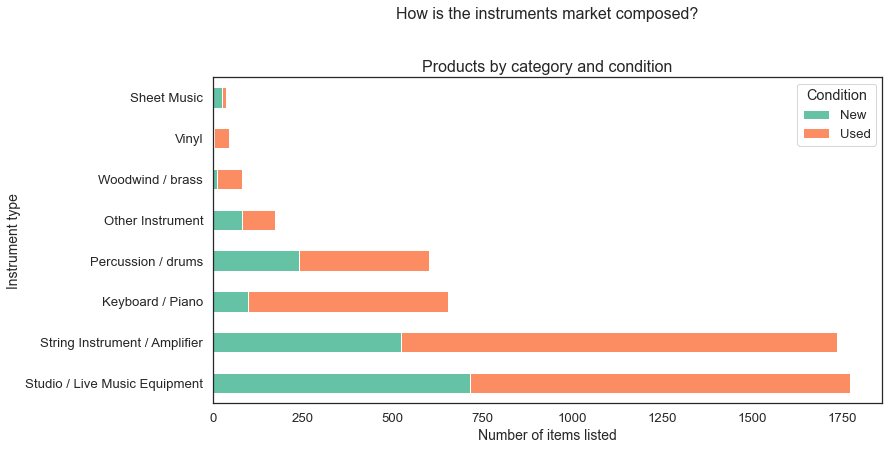

In [6]:
# We are going to make a stacked bar plot to see wich are the most popular categories
# and also the proportion of new and used items in each instrument type.

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

table["Items"].sort_values(["Total"], ascending=False).drop(["Total","% New", "% of Total"], axis=1).plot(kind='barh', stacked=True, ax=ax)
#add overall title
plt.title("How is the instruments market composed?\n\n\nProducts by category and condition", fontsize=16)

#add axis titles
plt.xlabel('Number of items listed', fontsize=14)
plt.ylabel('Instrument type', fontsize=14)


From this bar chart we can get a broad picture of how the musical instruments market of Sri Lanka is composed (based on this sample). We can see that the most popular items are in the Studio/Live Equipment category, followed closely by String Instruments. We can appreciate also that there are more used items than new ones in almost all instrument types, the only exception being Sheet Music. 

<AxesSubplot:xlabel='Price_value', ylabel='Instrument_Type'>

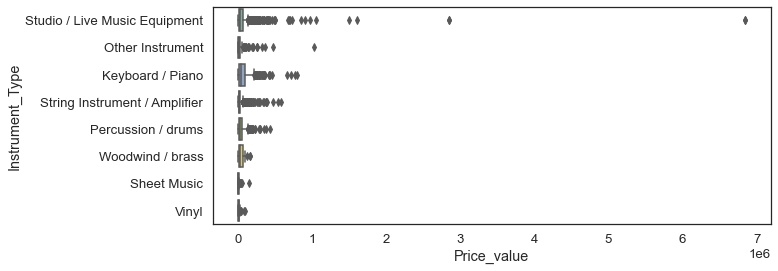

In [18]:
#GRAPH: Bar plot that shows de 10 most popular items, grouped by instrument
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
title = "10 Most popular musical instruments on sell"
sns.boxplot(y="Instrument_Type", x="Price_value", orient="h", ax=ax, data=df.sort_values(["Price_value"],ascending=False))

We se that are some very expensive items in the Studio/Live Music equipment category. By the name of the category, it sounds logical it could contain some very expensive products. Nevertheless, now we want to get a broad picture of pices distribution in the market so, for now, we are going to discard de 10% most expensive items

<AxesSubplot:xlabel='Price_value', ylabel='Instrument_Type'>

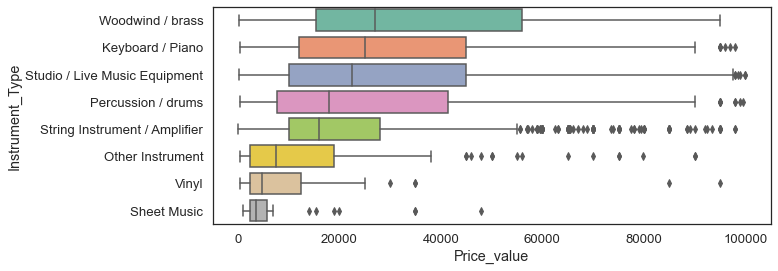

In [70]:
#We set a limit percentile, and we will only take values under that
limit_percentile = 90
limit_price = np.percentile(list(df["Price_value"]), limit_percentile)

# Extract the data to be plotted into an aux dataframe in order to sort boxes by mean when plotting
df_bp = df[["Instrument_Type", "Price_value"]]
df_bp = df_bp[df["Price_value"] < limit_price]
df_means = df_bp.groupby(["Instrument_Type"]).agg({'Price_value': np.mean}).reset_index()
df_means.rename(columns={"Price_value":"Mean Price"}, inplace=True)
df_bp = pd.merge(df_bp, df_means, on="Instrument_Type")

#Box Plot
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y="Instrument_Type", x="Price_value", orient="h", ax=ax, data=df_bp.sort_values(["Mean Price"], ascending=False))

The origin of the dispersion of prices within instrument types is most likely due to the fact that each category encompasses not only the instruments themselves but also parts, accesories and related products. That effect is most noticeable in the Studio/Live Music Equipment category, wich contains a wide range of very different products.<br>
Let's take a deeper look in the Studio category.

### Most popular instruments and brands

In [8]:
# We are going to make a table to count how many instruments of each brand we have
table = df[["Instrument_Type", "Instrument", "Brand","Title", "Price_value"]].groupby(["Instrument_Type", "Instrument", "Brand"]).agg({'Title':"count","Price_value":np.mean}).rename(columns={"Title":"Items","Price_value":"Mean Price"}).reset_index().sort_values(["Instrument_Type","Instrument","Brand"])

In [9]:
table.sort_values(["Items"], ascending=False).head(10).style.set_caption("10 MOST POPULAR MUSICAL INSTRUMENTS")

,Instrument_Type,Instrument,Brand,Items,Mean Price
84,String Instrument / Amplifier,Guitar,Yamaha,126,31526.190476
12,Keyboard / Piano,Keyboard,Yamaha,95,75884.989474
3,Keyboard / Piano,Keyboard,Casio,45,19566.666667
10,Keyboard / Piano,Keyboard,Roland,35,81728.571429
64,String Instrument / Amplifier,Guitar,Fender,29,53544.793103
41,Percussion / drums,Drum,Roland,26,101400.000000
43,Percussion / drums,Drum,Yamaha,25,68260.000000
21,Keyboard / Piano,Piano,Yamaha,23,159152.173913
58,String Instrument / Amplifier,Guitar,Boss,16,39250.000000
67,String Instrument / Amplifier,Guitar,Ibanez,14,43107.142857


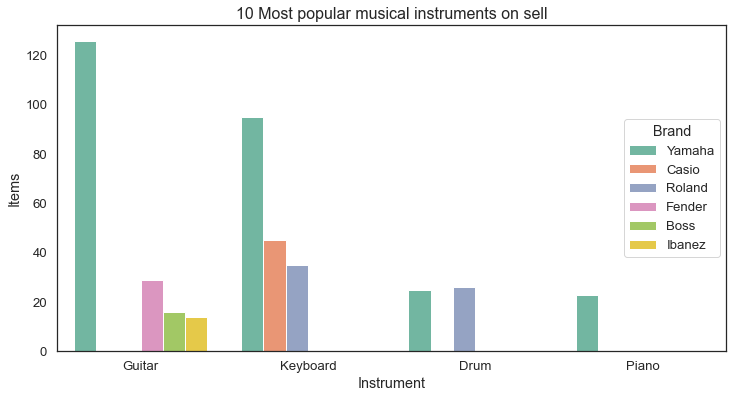

In [10]:
#GRAPH: Bar plot that shows de 10 most popular items, grouped by instrument
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
title = "10 Most popular musical instruments on sell"
sns.barplot(x = "Instrument", y = "Items", hue = "Brand", ax=ax, data = table.sort_values(["Items"], ascending=False).head(10)).set_title(title, fontsize=16)
#add overall title
#place legend in center right of plot
plt.legend(loc='center right', title='Brand')


As we can appreciate, the most popular items are Yamaha guitars, followed by Keyboards from Yamaha as well, but also from other well known brands. 

In [11]:
table.sort_values(["Mean Price"], ascending=False).head(10).style.set_caption("10 MOST EXPENSIVE MUSICAL INSTRUMENTS")

,Instrument_Type,Instrument,Brand,Items,Mean Price
48,String Instrument / Amplifier,Bass guitar,Lakland,1,335000.000000
36,Percussion / drums,Drum,Ludwig,1,280000.000000
17,Keyboard / Piano,Piano,Kawai,9,231666.666667
7,Keyboard / Piano,Keyboard,Nord,1,210500.000000
6,Keyboard / Piano,Keyboard,Korg,8,199625.000000
21,Keyboard / Piano,Piano,Yamaha,23,159152.173913
76,String Instrument / Amplifier,Guitar,Prs,2,157500.000000
50,String Instrument / Amplifier,Bass guitar,Warwick,1,145000.000000
68,String Instrument / Amplifier,Guitar,Jackson,1,135000.000000
104,Woodwind / brass,Bass guitar,Yamaha,1,125000.000000


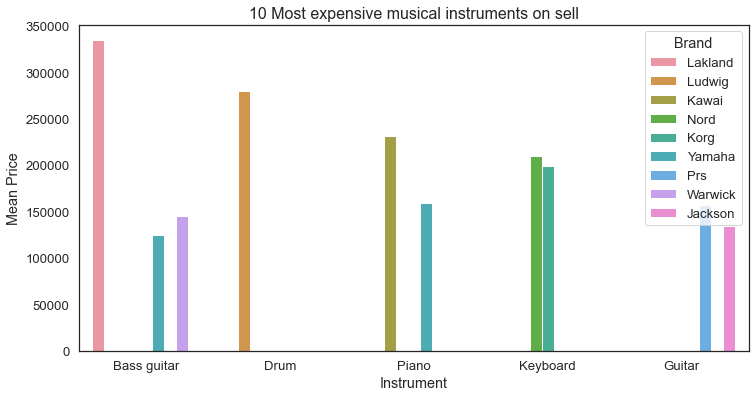

In [12]:
#GRAPH: Bar plot that shows de 10 most popular items, grouped by instrument
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
title = "10 Most expensive musical instruments on sell"
sns.barplot(x = "Instrument", y = "Mean Price", hue = "Brand", ax=ax, data = table.sort_values(["Mean Price"], ascending=False).head(10)).set_title(title, fontsize=16)
#add overall title
#place legend in center right of plot
plt.legend(loc='best', title='Brand')


We can see that there are expensive instrumens in every category. The most expensive one is a bass guitar from Lakland. We can check what makes it so special taking a look at the info in the title and the description

In [13]:
df[(df["Brand"] == "Lakland") & (df["Instrument"] == "Bass guitar")]

,Title,Sub_title,Price,Instrument_Type,Condition,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Is_new,Premium_seller,Price_value,Published,Instrument,Brand
1017,Lakland Skyline 55_02 Deluxe Cherry Sunburst B...,"Posted on 12 Oct 10:37 am, Nugegoda, Colombo","Rs 335,000",String Instrument / Amplifier,New,"Nugegoda, Colombo",::::::::::::::::::::: Purchase Link ::::::::::...,https://ikman.lk/en/ad/lakland-skyline-55-02-d...,Darshana,Member,2021-10-12 10:37:00,1,1,335000,2021-10-12 10:37:00,Bass guitar,Lakland
